***Nieto Taboada Luis Antonio - 2024630806***


**3AM1 - METODOS NUMERICOS**

*ALGORITMO DE BISECCION*

A grandes rasgos, el algoritmo de biseccion consiste en: 
1. Establecer un rango inicial [a, b] en el cual se sabe que existe una raiz.
2. Calcular el punto medio del rango
2.1. Si el punto medio tiene el mismo signo que el limite inferior, se sustituye el limite inferior por el punto medio.
2.2. Si el punto medio tiene el mismo signo que el limite superior, se sustituye el limite superior por el punto medio.
Cuando se llegue a un delta lo suficientemente pequeño, se puede considerar que el punto medio es la raiz. En este caso, el delta es el de maquina.

In [2]:

#Funciones
def f(x):
    return x - 100 # Expresion matematica.

def signo(a):
    if a == 0:
        return "0"
    elif a < 0:
        return "-"
    else: 
        return "+"


# valorX = [ limite, valor en f, signo ]
rangeHistory = list()
i = int(0)
maxIter = int(input('maximo numero de iteraciones: '))
stopDelta = ...
valoresInf = [0,0,0]
valoresSup = [0,0,0]
nuevoLim   = [0,0,0]


# Init
valoresInf[0] = float(input("Limite inferior (a): "))
valoresInf[1] = f(valoresInf[0])
valoresInf[2] = signo(valoresInf[1])

valoresSup[0] = float(input("Limite superior (b): "))
valoresSup[1] = f(valoresSup[0])
valoresSup[2] = signo(valoresSup[1])

rangeHistory.append([valoresInf[0], valoresSup[0]])


if valoresInf[2] == valoresSup[2]:
    print("escoja un rango cuyos limites tengan signo diferente en f. f(a)*f(b))<0. ")
else:
    while i < maxIter:
        print('\n')
        print(f'rango: [{valoresInf[0]}, {valoresSup[0]}]-----------------')
        print(f'valoresInf: {valoresInf}')
        print(f'valoresSup: {valoresSup}')        
        i = i + 1
        nuevoLim[0] = (valoresInf[0] + valoresSup[0]) / 2
        nuevoLim[1] = f(nuevoLim[0])
        nuevoLim[2] = signo(nuevoLim[1])
        print(f'nuevoLim: {nuevoLim}')

        if nuevoLim[2] == valoresInf[2]:
            valoresInf[0] = nuevoLim[0]
            valoresInf[1] = nuevoLim[1]
            valoresInf[2] = nuevoLim[2]
            print('inf')
        elif nuevoLim[2] == valoresSup[2]:
            valoresSup[0] = nuevoLim[0]
            valoresSup[1] = nuevoLim[1]
            valoresSup[2] = nuevoLim[2]
            print('sup')

        else: 
            print(f'raiz encontrada en: {nuevoLim}')
            rangeHistory.append([valoresInf[0], valoresSup[0]])
            break

        rangeHistory.append([valoresInf[0], valoresSup[0]])
        #nuevoLim = [0,0,0]


maximo numero de iteraciones:  10
Limite inferior (a):  50
Limite superior (b):  200




rango: [50.0, 200.0]-----------------
valoresInf: [50.0, -50.0, '-']
valoresSup: [200.0, 100.0, '+']
nuevoLim: [125.0, 25.0, '+']
sup


rango: [50.0, 125.0]-----------------
valoresInf: [50.0, -50.0, '-']
valoresSup: [125.0, 25.0, '+']
nuevoLim: [87.5, -12.5, '-']
inf


rango: [87.5, 125.0]-----------------
valoresInf: [87.5, -12.5, '-']
valoresSup: [125.0, 25.0, '+']
nuevoLim: [106.25, 6.25, '+']
sup


rango: [87.5, 106.25]-----------------
valoresInf: [87.5, -12.5, '-']
valoresSup: [106.25, 6.25, '+']
nuevoLim: [96.875, -3.125, '-']
inf


rango: [96.875, 106.25]-----------------
valoresInf: [96.875, -3.125, '-']
valoresSup: [106.25, 6.25, '+']
nuevoLim: [101.5625, 1.5625, '+']
sup


rango: [96.875, 101.5625]-----------------
valoresInf: [96.875, -3.125, '-']
valoresSup: [101.5625, 1.5625, '+']
nuevoLim: [99.21875, -0.78125, '-']
inf


rango: [99.21875, 101.5625]-----------------
valoresInf: [99.21875, -0.78125, '-']
valoresSup: [101.5625, 1.5625, '+']
nuevoLim: [100.390625, 0.39062

Text(0.5, 1.0, 'f(x) = x - 100')

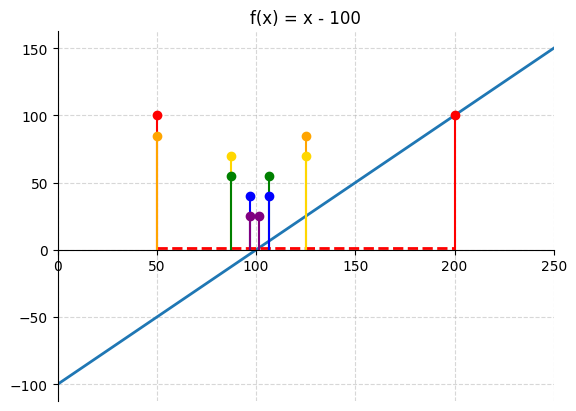

In [50]:
import numpy as np
import matplotlib.pyplot as plt
i = 0
j = 0
stemH = 100
colors = ['red', 'orange', 'gold', 'green', 'blue', 'purple']

numP = 5000 # Numero de puntos
xmin = 0 # punto en x minimo. Hasta donde la funcion puede bajar
xmax = 250 # punto maximo en x. Hasta donde la funcion puede subir
x = np.linspace(xmin, xmax, numP, dtype=float) # Todos los puntos en los cual la funcion se va a mover
y = f(x)


# Function Plot
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=2)
ax.plot(rangeHistory[0], yCord, color='red', linewidth=2, linestyle='--') # Range Plot
ax.grid(True, which="both", linestyle="--", alpha=0.5)

# Range Plot
for r in rangeHistory:
    for lim in r:
        ax.stem(lim, stemH, linefmt=colors[i])
    i = i+1
    stemH = stemH - 15

    if i >= 6:
        break
    else: continue

# keep 0 visible in both axes
ax.set_xlim(xmin, xmax)
ymin = min(y.min(), 0.0)
ymax = max(y.max(), 0.0)
pad = 0.05 * (ymax - ymin if ymax != ymin else 1.0)
ax.set_ylim(ymin - pad, ymax + pad)

# center axes at (0,0)
ax.spines["left"].set_position("zero")
ax.spines["bottom"].set_position("zero")
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")

ax.set_title("f(x) = x - 100")


In [ ]:
print(rangeHistory)